In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
iris=pd.read_csv(r'D:\Ben\Ben\OneDrive\2019\Python\Materials\IrisCompleted.csv')

FileNotFoundError: File b'D:\\Ben\\Ben\\OneDrive\\2019\\Python\\Materials\\IrisCompleted.csv' does not exist

In [ ]:
iris.head()

In [ ]:
sns.relplot(x="Sepal_L", y="Petal_W", data=iris,hue="Species",alpha=0.5,size="Petal_W");

In [ ]:
sns.pairplot(iris,hue="Species");

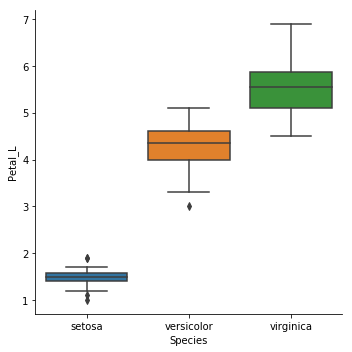

In [55]:
sns.catplot(x="Species", y="Petal_L", kind="box", data=iris);

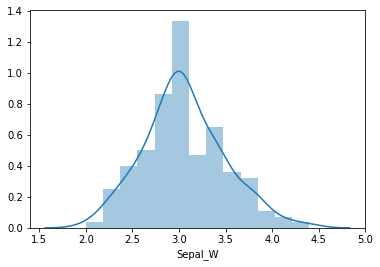

In [56]:
sns.distplot(iris['Sepal_W'])

In [57]:
from sklearn import cluster, datasets, metrics

In [58]:
iris_X = iris.iloc[:,:4]

In [59]:
iris_X = iris.iloc[:,:4]

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(iris_X)
cluster_labels = kmeans_fit.labels_

# 印出績效
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.5528190123564101


In [60]:
iris['pred']=cluster_labels

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


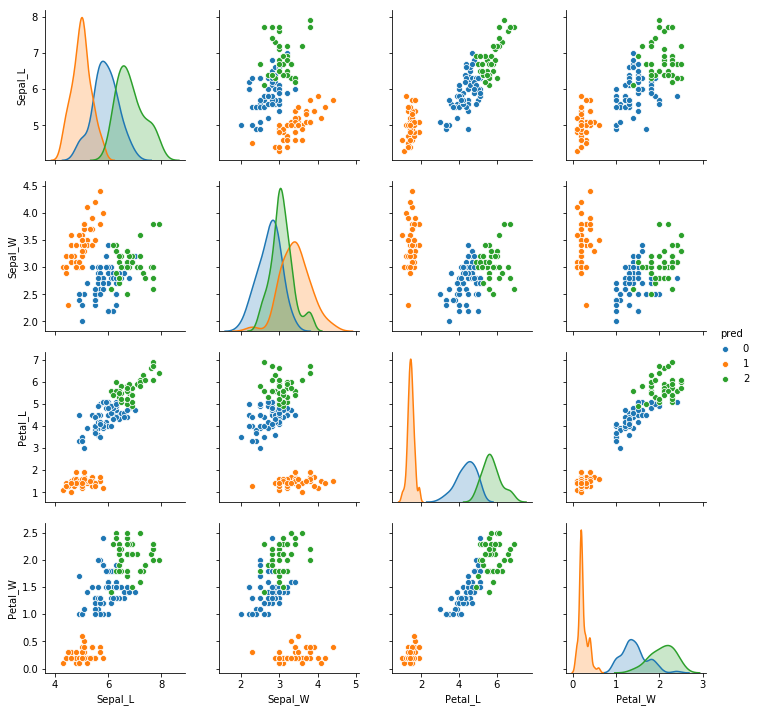

In [61]:
sns.pairplot(iris,hue='pred',vars=['Sepal_L','Sepal_W','Petal_L','Petal_W']);

# 以 Kmeans 執行 RFM 分析

In [62]:
Buying=pd.read_csv(r'D:\Ben\Ben\OneDrive\2019\Python\Materials\RFM_Sample.csv')

In [63]:
Buying.head()

,ID,R,F,M
0,A101,253.0,1.0,500.0
1,A102,56.0,5.0,2031.0
2,A103,39.0,37.0,14621.0
3,A104,43.0,36.0,13172.0
4,A107,37.0,40.0,16266.0


In [64]:
Buying_data=Buying[['R','F','M']]

In [65]:
Buying_data.head()

,R,F,M
0,253.0,1.0,500.0
1,56.0,5.0,2031.0
2,39.0,37.0,14621.0
3,43.0,36.0,13172.0
4,37.0,40.0,16266.0


#### 數據的尺度範圍差異過大，需要先執行正規化處理
#### (D-Mean) / SD

In [66]:
from sklearn import preprocessing

In [67]:
nb=preprocessing.scale(Buying_data)

In [68]:
print(nb)

[[ 2.08015438e+00 -9.42287645e-01 -8.33520444e-01]
 [-3.99378023e-01 -6.33308407e-01 -5.42860150e-01]
 [-6.13347824e-01  1.83852550e+00  1.84735089e+00]
 [-5.63001989e-01  1.76128069e+00  1.57225829e+00]
 [-6.38520742e-01  2.07025993e+00  2.15965408e+00]
 [ 1.06065121e+00 -2.47084359e-01 -3.23773292e-01]
 [-8.27317625e-01  1.14332221e+00  9.31894367e-01]
 [ 1.85359812e+00 -7.87798026e-01 -6.87335972e-01]
 [-4.37137400e-01 -3.24329169e-01 -4.05029076e-01]
 [ 4.06155347e-01 -5.56063597e-01 -5.96018139e-01]
 [ 1.41307206e+00 -9.42287645e-01 -8.87817533e-01]
 [-7.26625954e-01 -4.78818788e-01 -5.94309490e-01]
 [-5.12656153e-01 -2.47084359e-01 -3.18837193e-01]
 [ 1.85359812e+00 -9.42287645e-01 -8.36937743e-01]
 [-5.00069694e-01 -4.01573978e-01 -5.00143908e-01]
 [ 1.17392934e+00 -9.42287645e-01 -8.51556190e-01]
 [-5.25242612e-01 -1.69839549e-01 -2.94916097e-01]
 [-8.14731167e-01 -6.33308407e-01 -5.74944794e-01]
 [ 1.04806475e+00 -8.65042836e-01 -8.16813647e-01]
 [ 8.21508491e-01 -6.33308407e-

In [69]:
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(nb)
cluster_labels = kmeans_fit.labels_

In [70]:
print(cluster_labels)

[1 0 2 2 2 1 2 1 0 0 1 0 0 1 0 1 0 0 1 1 0 2 0 0 0 0 1 2 1 1 1 2 2 0 0 0 2
 2 2 0 0 0 0 0 0 0 0 2 0 1 2 2 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 2 2 0 1 1 1
 1 0 1 2 0 0 0 0 2 1 2 1 0 0 1 1 1 1 0 1 1 1 0 1 1 2 0 2 2 0 0 2 0 2 2 0 1
 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 1 0 2 1 0 1 2 0 0 2 1 0 2 0 0 2 1 2 0 1 0 0
 1 2 1 2 0 2 2 1]


### 計算平均 Silhoutte Score 已決定最佳 K 值

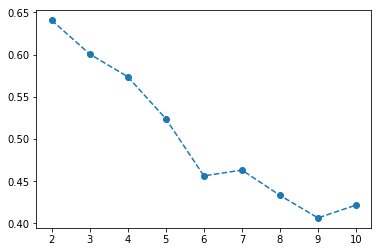

In [71]:
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(nb)
    sil_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(nb, sil_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.plot(ks, silhouette_avgs,'o--')

### 為各組命名並執行對策

In [72]:
Buying['Group']=cluster_labels

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


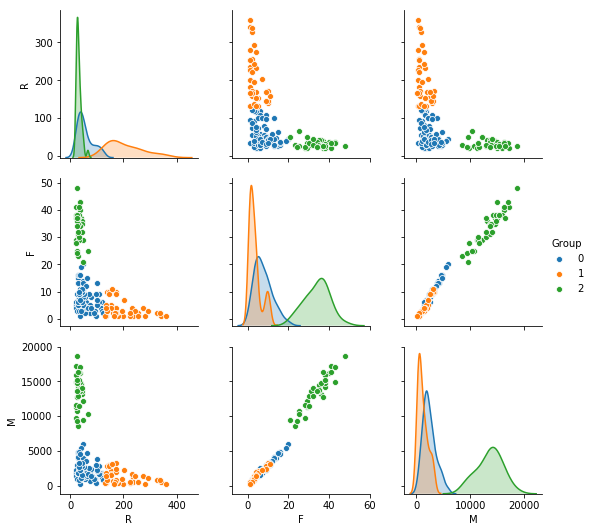

In [73]:
sns.pairplot(Buying,hue='Group',vars=['R','F','M']);